# TensorFlow
https://note.nkmk.me/python-tensorflow-keras-basics/

- スカラー (Tensor rank0)  
- ベクトル (Tensor rank1)  
- 行列     (Tensor rank2)
- Tensor  

### Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### 訓練データ（ランダムなサンプル）作成

In [2]:
# sample
observations = 1000
xs = np.random.uniform(low=-10,high=10,size=(observations,1))
zs = np.random.uniform(low=-10,high=10,size=(observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(low=-1,high=1,size=(observations,1))
generated_targets = 2*xs - 3*zs + 5 + noise

### TensorFlowの形式に合わせてデータを保存する

NumPy独自のバイナリファイルに保存  
https://note.nkmk.me/python-numpy-load-save-savez-npy-npz/

In [3]:
# 実行プログラムと同階層に保存される
np.savez('TF_intro',inputs=generated_inputs,targets=generated_targets)

### データ読込み

In [5]:
training_data =np.load('TF_intro.npz')

### モデルの作成

#### 入出力データ数の定義

In [27]:
# 入力はx,zの数
input_size = 2

# 出力はyの数
output_size = 1

In [ ]:
# default
model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size)
])
# 目的関数と最適化アルゴリズムの設定  
#-目的関数  ->L2ノルム
#  >mean_squared_error
#-最適化アルゴリズム
#  >sgd : 確率的勾配降下法
model.compile(optimizer = 'sgd', loss='mean_squared_error')

### モデルのカスタマイズ設定

#### 重みとバイアスの初期値の設定
>重み：kernel_initializer  
>バイアス :bias

In [32]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size,
                         kernel_initializer = tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                         bias_initializer = tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                         )
])

#### 学習率の設定

In [33]:
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

#### 目的関数と最適化アルゴリズムの設定  

https://keras.io/ja/losses/


In [34]:
model.compile(custom_optimizer, loss ='mean_squared_error')

### 訓練

In [35]:
# epochs : 繰り返しの数
epochs_cnt = 100

In [41]:
# verbose=1
#エポックごとのログがプログレスバーの進行状況とともに示される。
#verbose=2
#プログレスバーなし（エポックごとのログはあり）
#verbose=0
#出力が一切なし

model.fit(training_data['inputs'],training_data['targets'],epochs=epochs_cnt,verbose=2)

Train on 1000 samples
Epoch 1/100
1000/1000 - 0s - loss: 0.3520
Epoch 2/100
1000/1000 - 0s - loss: 0.3460
Epoch 3/100
1000/1000 - 0s - loss: 0.3571
Epoch 4/100
1000/1000 - 0s - loss: 0.3577
Epoch 5/100
1000/1000 - 0s - loss: 0.3645
Epoch 6/100
1000/1000 - 0s - loss: 0.3591
Epoch 7/100
1000/1000 - 0s - loss: 0.3840
Epoch 8/100
1000/1000 - 0s - loss: 0.3930
Epoch 9/100
1000/1000 - 0s - loss: 0.3516
Epoch 10/100
1000/1000 - 0s - loss: 0.3463
Epoch 11/100
1000/1000 - 0s - loss: 0.3669
Epoch 12/100
1000/1000 - 0s - loss: 0.3408
Epoch 13/100
1000/1000 - 0s - loss: 0.3666
Epoch 14/100
1000/1000 - 0s - loss: 0.3897
Epoch 15/100
1000/1000 - 0s - loss: 0.3825
Epoch 16/100
1000/1000 - 0s - loss: 0.3668
Epoch 17/100
1000/1000 - 0s - loss: 0.3518
Epoch 18/100
1000/1000 - 0s - loss: 0.3477
Epoch 19/100
1000/1000 - 0s - loss: 0.3960
Epoch 20/100
1000/1000 - 0s - loss: 0.3751
Epoch 21/100
1000/1000 - 0s - loss: 0.3682
Epoch 22/100
1000/1000 - 0s - loss: 0.3791
Epoch 23/100
1000/1000 - 0s - loss: 0.339

## 重みとバイアスの出力

In [37]:
# layers : ディープニューラルネットワークの層(隠れ層)の深さ
# weight array
# biases array
model.layers[0].get_weights()

[array([[ 1.9297246],
        [-3.013228 ]], dtype=float32),
 array([5.0148726], dtype=float32)]

[考察]  
ターゲット  
generated_targets = 2*xs - 3*zs + 5 + noise
<br><br>
結果  
[array([[ 1.9632605],
        [-2.9835043]], dtype=float32),  
 array([5.007174], dtype=float32)]  
<br>
考察  
ディープラーニングによりターゲットに近い変数を予測することができた

### 出力データの抽出

In [38]:
predict_data = model.predict_on_batch(training_data['inputs']).numpy().round(1)

In [39]:
target_data = training_data['targets'].round(1)

### 散布図を作成し視覚化する

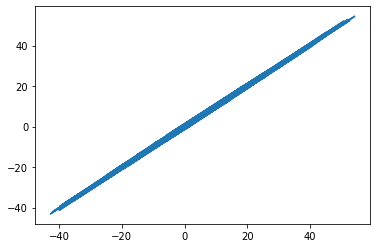

In [40]:
plt.plot(np.squeeze(predict_data),np.squeeze(target_data))